In [1]:
### Version : Python 3.10.12
### Coding : UTF-8

In [2]:
### We import packages

# To manage dataframes
import numpy as np
import pandas as pd

# To realize graphs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go

# To perform linear and polynomial regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
quadratic_transformation = PolynomialFeatures(2,include_bias = False).fit_transform
import sklearn.metrics
from sklearn.model_selection import train_test_split

# To fit the catenary curve
from scipy.optimize import curve_fit
import math

In [3]:
### We import our python files

import clustering

In [4]:
### We import our dataframes

lidar_easy = clustering.lidar_easy
lidar_medium = clustering.lidar_medium
lidar_hard = clustering.lidar_hard
lidar_extrahard = clustering.lidar_extrahard

list_df = clustering.list_df
list_difficulty = clustering.list_difficulty

In [5]:
### We define our colors (for future graphs)

green = "#53EEBA"
blue = "#0050DB"
orange = "#FF9F85"

In [6]:
# We check what the dataframes look like
lidar_easy.head(n = 5)

index          x          y          z  x_rotated  y_rotated  cluster
0      0  12.027449 -21.919416  11.557937   0.045431 -25.002366        2
1      7  11.780415 -21.631120  11.554015  -0.033131 -24.630925        2
2      8  11.802714 -21.606439  11.468175  -0.001729 -24.619956        2
3     12  11.725748 -21.450815  11.473142   0.005343 -24.446484        2
4     13  11.658920 -21.392229  11.492596  -0.025213 -24.363030        2

Linear model RMSE : 0.06442206953888475
Quadratic model RMSE : 0.06445647690815502


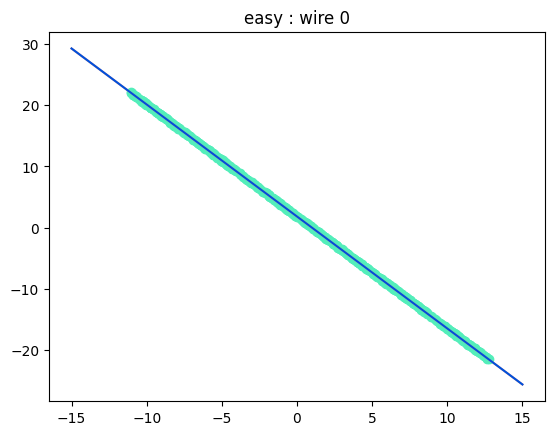

Linear model RMSE : 0.05627222954946186
Quadratic model RMSE : 0.05633174087450873


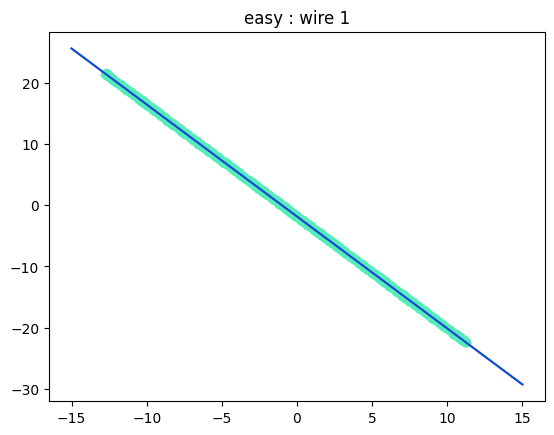

Linear model RMSE : 0.060670438294311846
Quadratic model RMSE : 0.060685907505514086


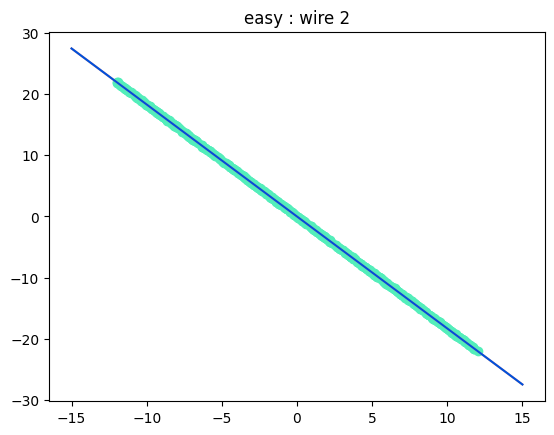

Linear model RMSE : 0.057851205110224894
Quadratic model RMSE : 0.05767705205649447


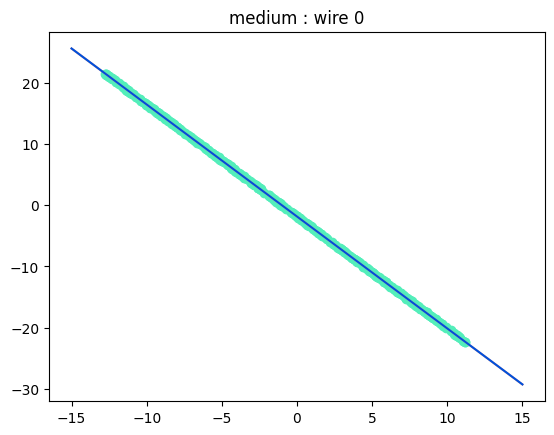

Linear model RMSE : 0.05538494037890889
Quadratic model RMSE : 0.05566027158966673


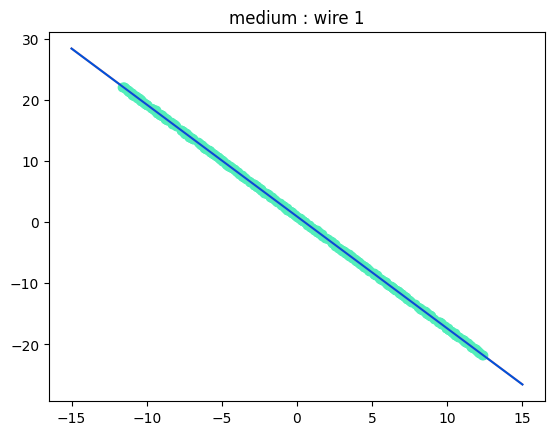

Linear model RMSE : 0.06660614422586456
Quadratic model RMSE : 0.06662446867929765


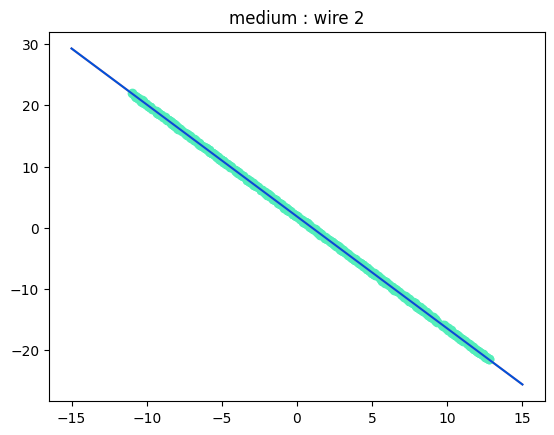

Linear model RMSE : 0.05715066907666968
Quadratic model RMSE : 0.05702837443456096


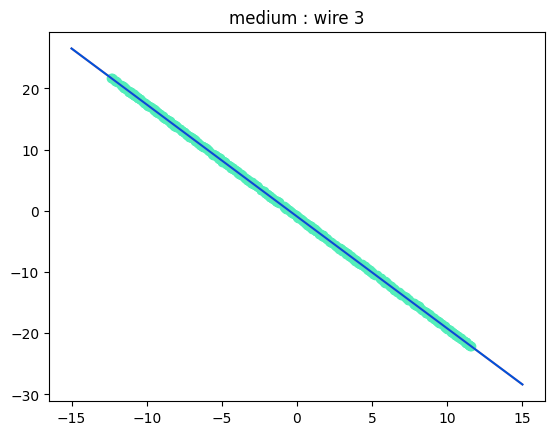

Linear model RMSE : 0.057644084896106285
Quadratic model RMSE : 0.05767543201686352


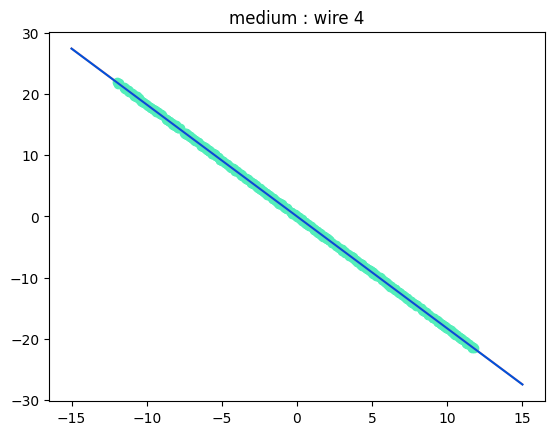

Linear model RMSE : 0.06043139283569353
Quadratic model RMSE : 0.06020682967989656


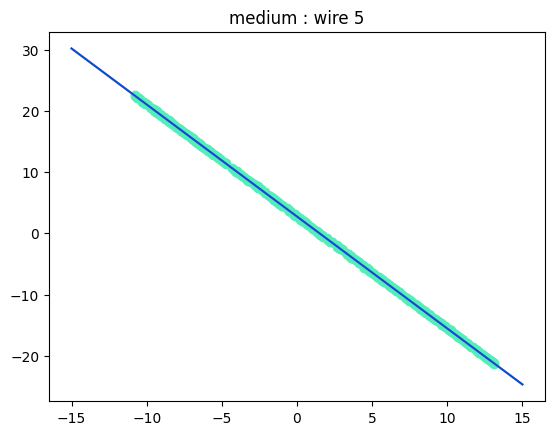

Linear model RMSE : 0.06027987825796497
Quadratic model RMSE : 0.06022522119708964


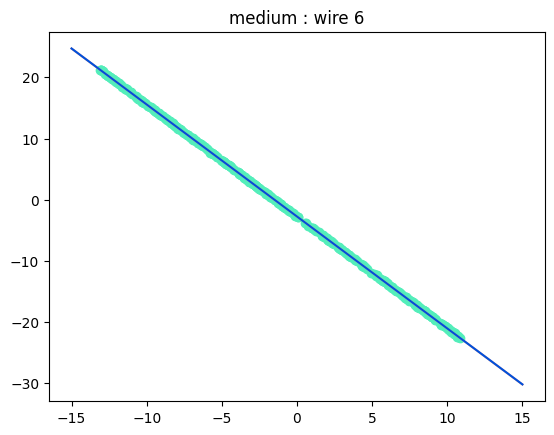

Linear model RMSE : 0.06414731220350207
Quadratic model RMSE : 0.0633640490882254


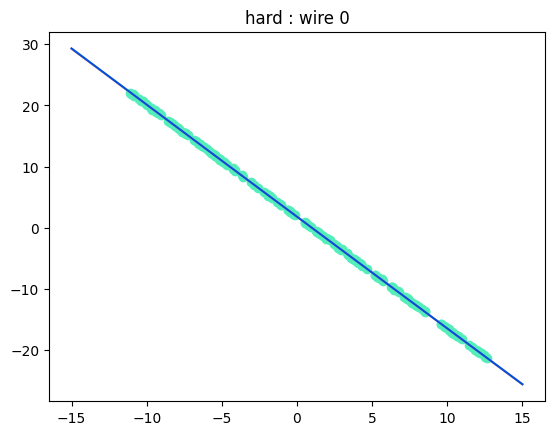

Linear model RMSE : 0.062116363344686794
Quadratic model RMSE : 0.06221923112649874


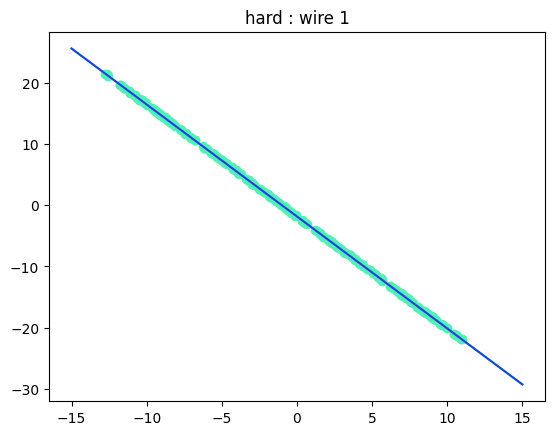

Linear model RMSE : 0.06376320116512531
Quadratic model RMSE : 0.06335191126701822


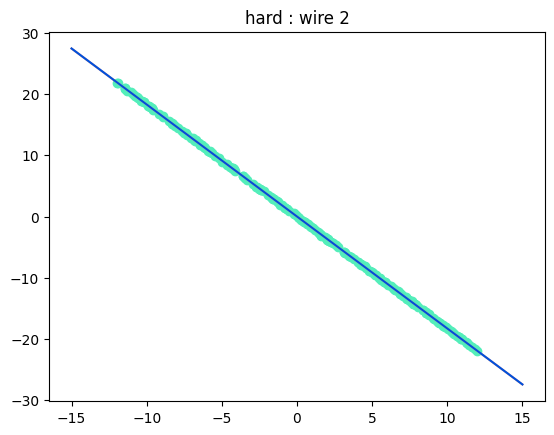

Linear model RMSE : 0.25906949312152383
Quadratic model RMSE : 0.061356034110842755


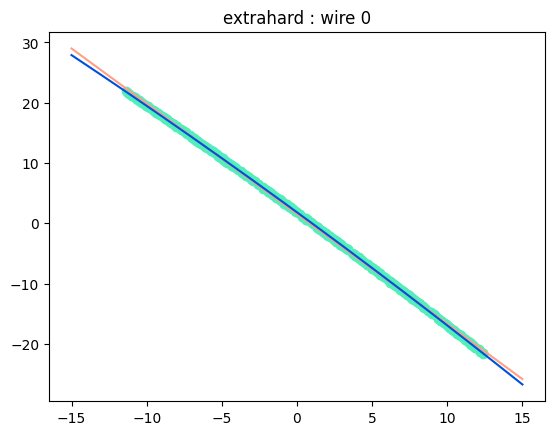

Linear model RMSE : 0.33003395637485494
Quadratic model RMSE : 0.07018321131561446


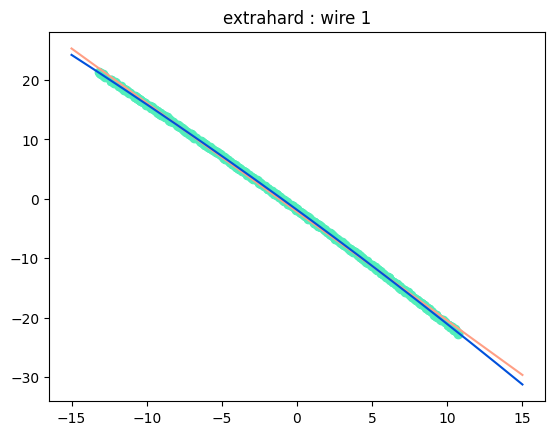

Linear model RMSE : 0.15727633656665296
Quadratic model RMSE : 0.06290614929547911


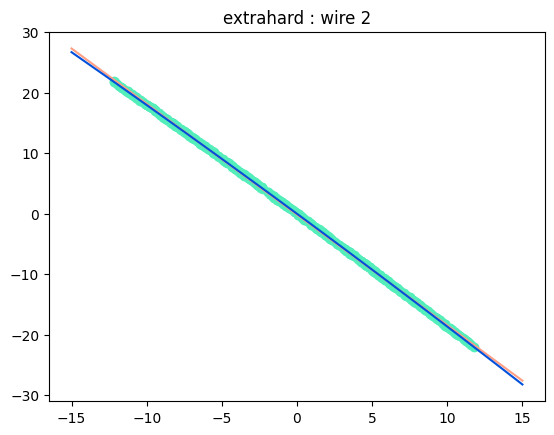

[['linear', 'linear', 'linear'],
 ['quadratic',
  'linear',
  'linear',
  'quadratic',
  'linear',
  'quadratic',
  'quadratic'],
 ['quadratic', 'linear', 'quadratic'],
 ['quadratic', 'quadratic', 'quadratic']]

In [7]:
### We find the plane of best fit for each cluster
# To do so, we compare a linear and a quadratic regression of y on x
# We keep the best model (regarding root mean squared errors) in a list

list_model = []
i = 0
for df in list_df :
    df_models = []
    list_cluster = sorted(list(set(df['cluster'])))
    for cluster in list_cluster :
        # Data
        x = df[df['cluster'] == cluster]['x'].values.reshape(-1, 1)
        y = df[df['cluster'] == cluster]['y'].values
        # We split data between training and testing sets to compare the two models
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
        # Linear model
        linear_model = LinearRegression().fit(X_train, y_train)
        y_linear_pred = linear_model.predict(X_test)
        rmse_linear = sklearn.metrics.mean_squared_error(y_test, y_linear_pred, squared = False)
        print(f"Linear model RMSE : {rmse_linear}")
        # Quadratic model
        quadratic_model = LinearRegression().fit(quadratic_transformation(X_train), y_train)
        y_quadratic_pred = quadratic_model.predict(quadratic_transformation(X_test))
        rmse_quadratic = sklearn.metrics.mean_squared_error(y_test, y_quadratic_pred, squared = False)
        print(f"Quadratic model RMSE : {rmse_quadratic}")
        # We show both models in graphs
        # Blue (orange) lines represent quadratic (linear) fits
        x_plot = np.linspace(-15, 15, 500).reshape(-1,1)
        y_linear_plot = linear_model.predict(x_plot)
        y_quadratic_plot = quadratic_model.predict(quadratic_transformation(x_plot))
        plt.scatter(x, y, color = green)
        plt.plot(x_plot, y_linear_plot, color = orange)
        plt.plot(x_plot, y_quadratic_plot, color = blue)
        plt.title(f"{list_difficulty[i]} : wire {cluster}")
        plt.show()
        # We keep the best model regarding rmse
        if rmse_linear < rmse_quadratic :
            model = "linear"
        else :
            model = "quadratic"

        df_models.append(model)
    list_model.append(df_models)
    i += 1

list_model

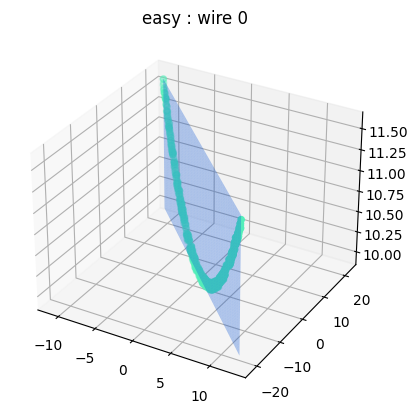

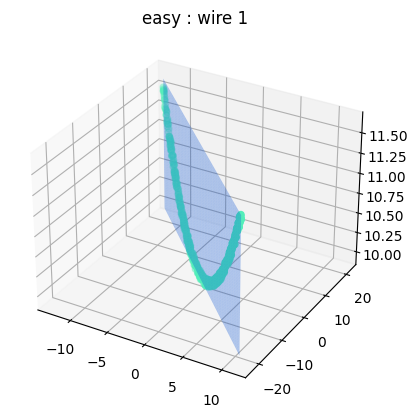

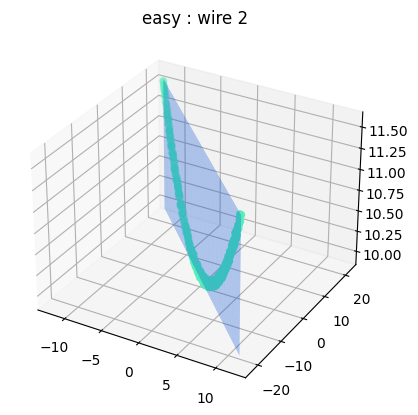

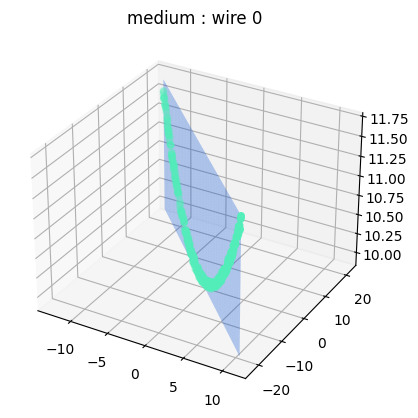

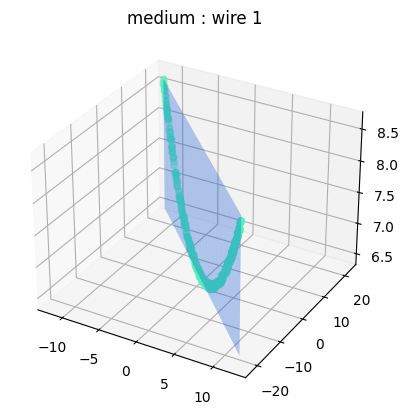

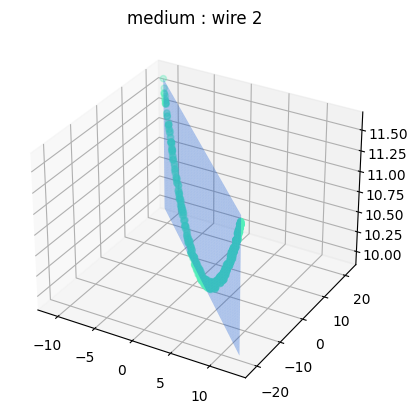

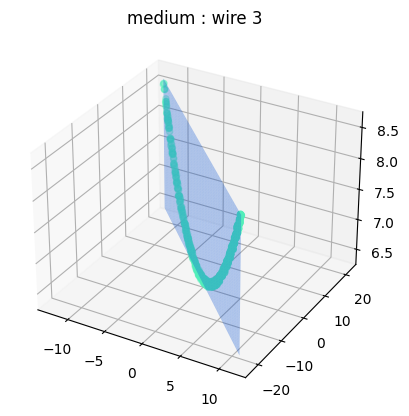

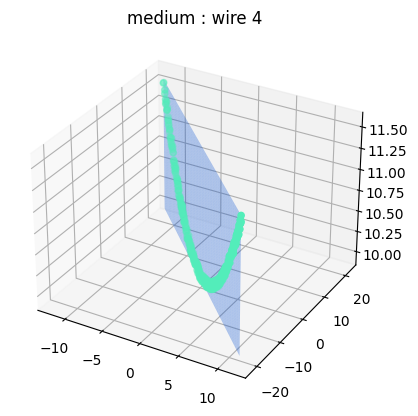

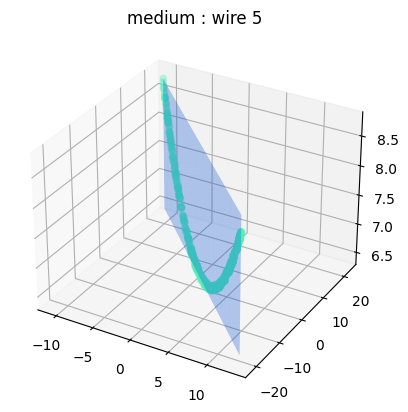

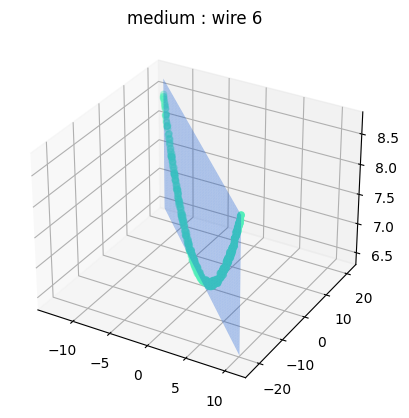

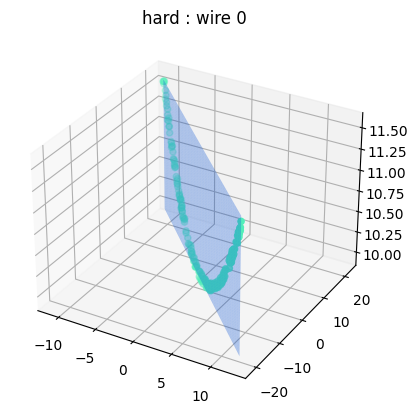

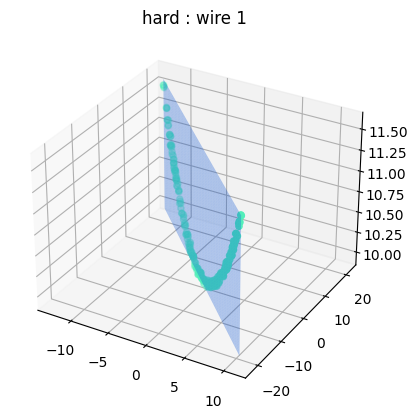

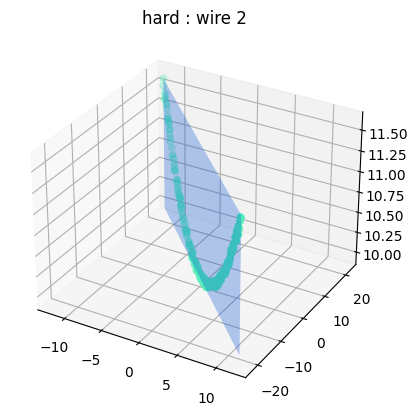

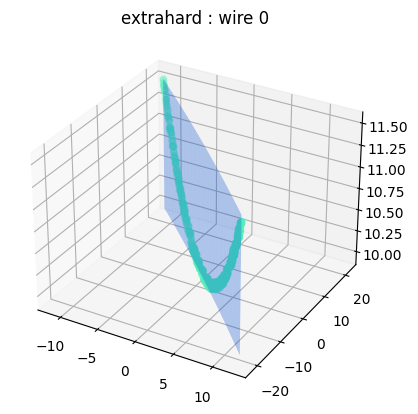

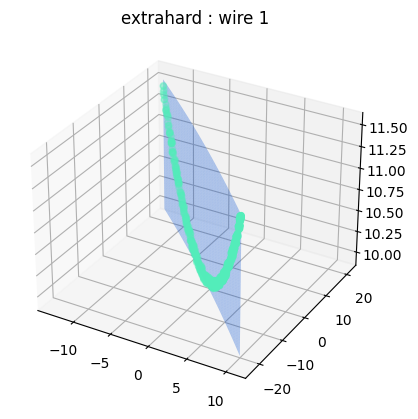

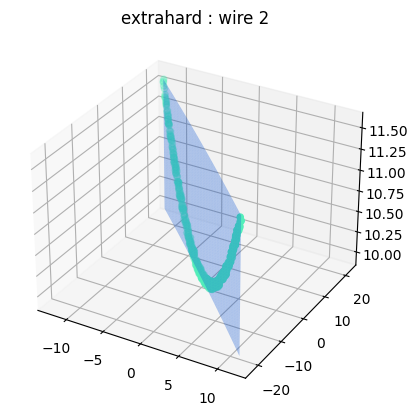

In [8]:
# We visualize the different planes of best fit

i = 0
for df in list_df :
    j = 0
    list_cluster = sorted(list(set(df['cluster'])))
    for cluster in list_cluster :
        # Data
        x = df[df['cluster'] == cluster]['x'].values
        y = df[df['cluster'] == cluster]['y'].values
        z = df[df['cluster'] == cluster]['z'].values
        # Model selection
        if list_model[i][j] == 'linear' :
            model = LinearRegression().fit(x.reshape(-1, 1), y)
        else :
            model = LinearRegression().fit(quadratic_transformation(x.reshape(-1, 1)), y)
        # We represent the plane of best fit
        xs = np.linspace(min(x), max(x), 500)
        zs = np.linspace(min(z), max(z), 500)
        X, Z = np.meshgrid(xs, zs)
        if list_model[i][j] == 'linear' :
            Y = model.predict(xs.reshape(-1,1))
        else :
            Y = model.predict(quadratic_transformation(xs.reshape(-1,1)))
        # We show the graphs
        # We use matplotlib instead of plotly for performance
        fig = plt.figure()
        ax = fig.add_subplot(111, projection = '3d')
        ax.scatter(x, y, z, color = green, marker = 'o')
        ax.plot_surface(X, Y, Z, color = blue, alpha = 0.3)
        plt.title(f"{list_difficulty[i]} : wire {cluster}")
        plt.show()

        j += 1
    i += 1


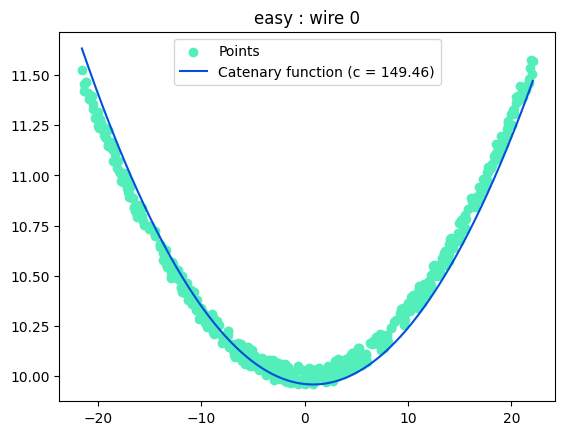

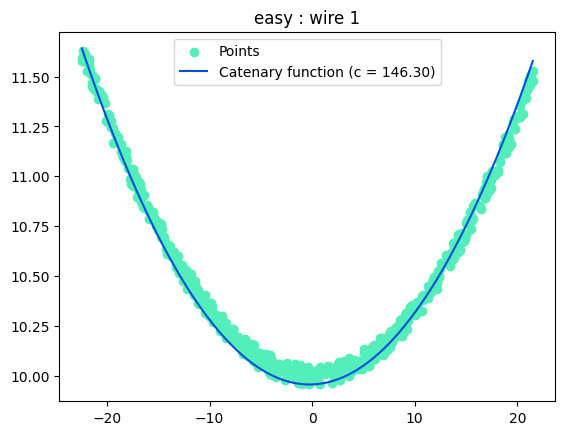

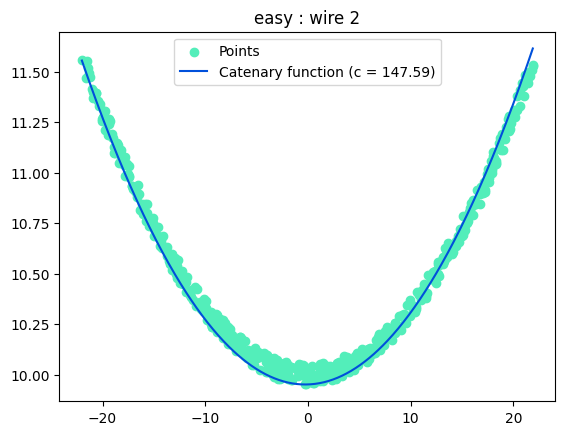

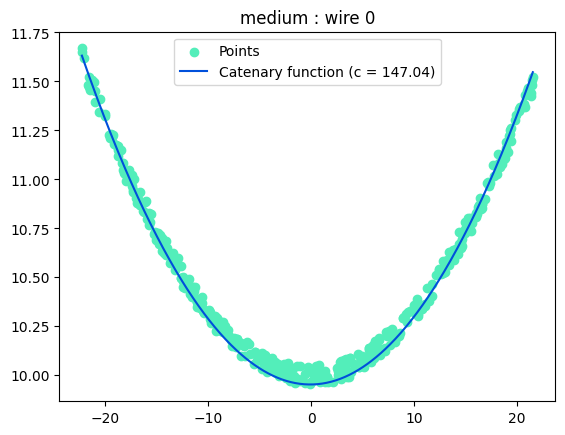

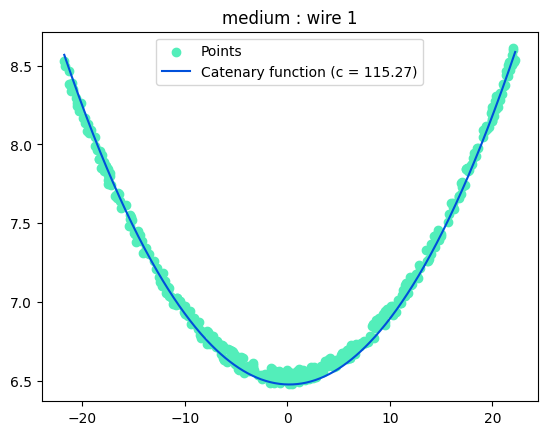

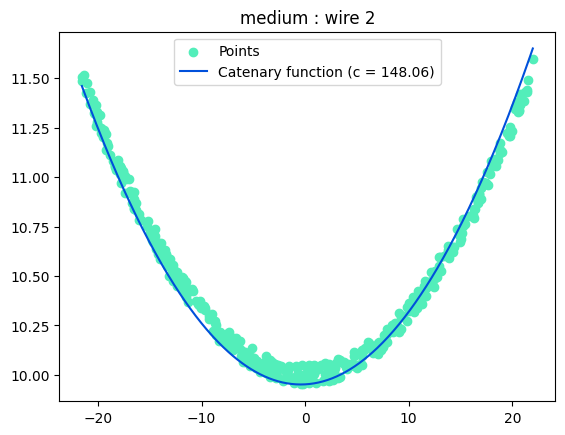

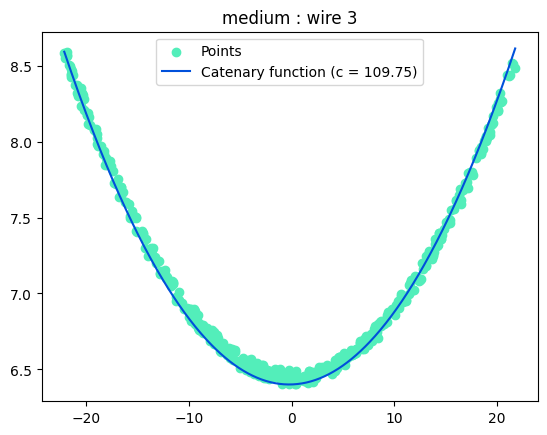

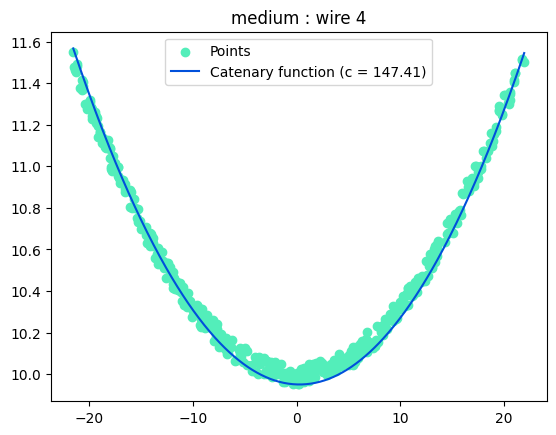

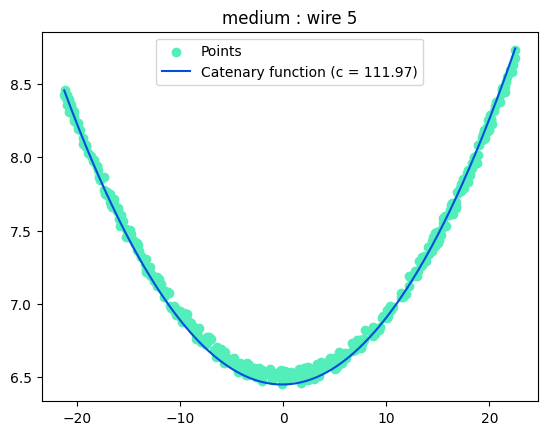

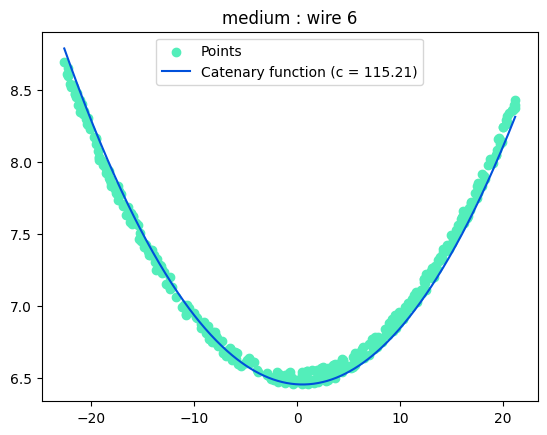

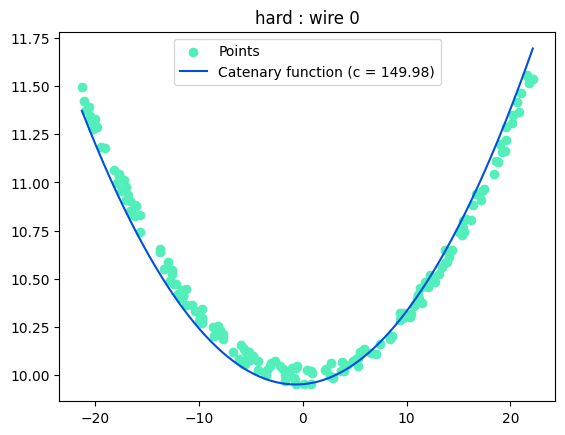

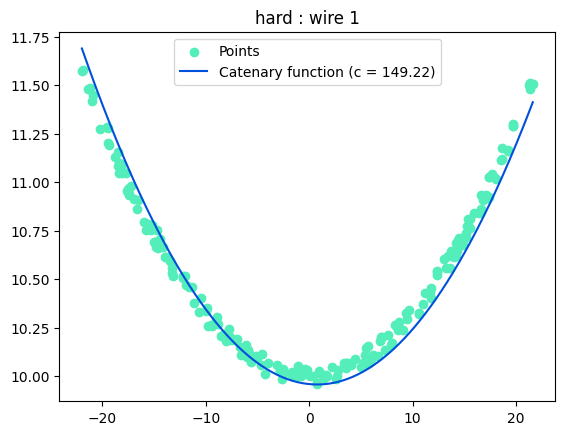

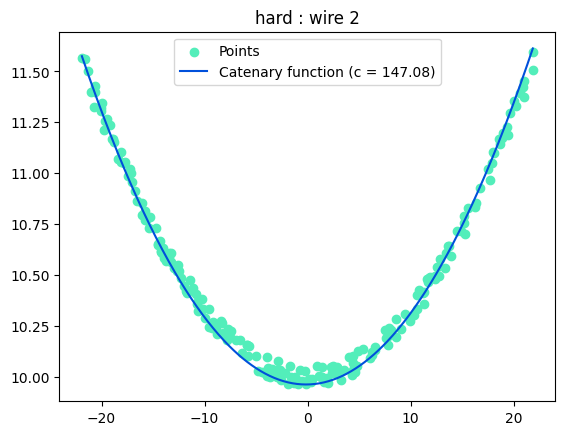

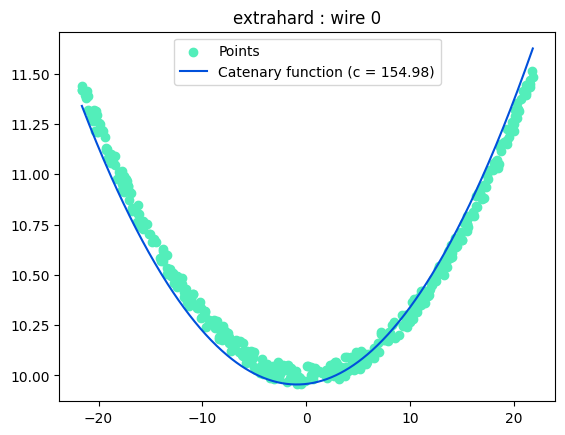

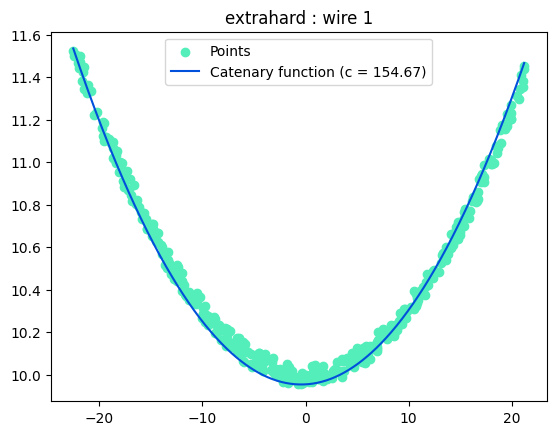

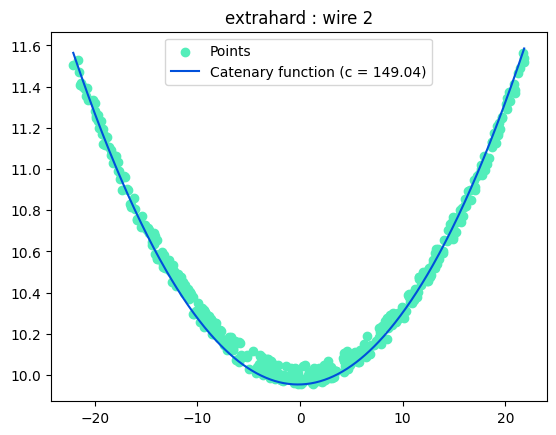

In [9]:
### We determine the coefficient c of the catenary equation
# To do so, we look for the best fit between predicted y and z coordinates, given the catenary function

i = 0
for df in list_df :
    j = 0
    list_cluster = sorted(list(set(df['cluster'])))
    for cluster in list_cluster :
        # Data
        x = df[df['cluster'] == cluster]['x'].values
        y = df[df['cluster'] == cluster]['y'].values
        z = df[df['cluster'] == cluster]['z'].values
        # Model selection
        if list_model[i][j] == 'linear' :
            model = LinearRegression().fit(x.reshape(-1, 1), y)
            y_pred = model.predict(x.reshape(-1, 1))
        else :
            model = LinearRegression().fit(quadratic_transformation(x.reshape(-1, 1)), y)
            y_pred = model.predict(quadratic_transformation(x.reshape(-1, 1)))
        # We get the index of the min of the z coordinates
        index_min_z = np.argmin(z)
        y0 = y_pred[index_min_z]
        z0 = z[index_min_z]            
        # We define our catenary function
        def function_catenary(y : float, c : float) -> float :
            return z0 + c * (np.cosh((y - y0)/c) - 1)
        # We fit the function to the points
        param_estim, _ = curve_fit(function_catenary, y_pred, z)
        # We visualize the fit
        plt.scatter(y_pred, z, color = green, label = 'Points')
        y_range = np.linspace(min(y_pred), max(y_pred), 500)
        z_estim = function_catenary(y_range, param_estim[0])
        plt.plot(y_range, z_estim, color = blue, label = f'Catenary function (c = {param_estim[0]:.2f})')
        plt.title(f"{list_difficulty[i]} : wire {cluster}")
        plt.legend(loc = 'upper center')
        plt.show()
        j += 1
    i += 1


In [10]:
### We now represent our catenary functions in 3D graphs

i = 0
for df in list_df :
    j = 0
    list_cluster = sorted(list(set(df['cluster'])))
    for cluster in list_cluster :
        # Data
        x = df[df['cluster'] == cluster]['x'].values
        y = df[df['cluster'] == cluster]['y'].values
        z = df[df['cluster'] == cluster]['z'].values
        xs = np.linspace(min(x), max(x), 500)
        # Model selection
        if list_model[i][j] == 'linear' :
            model = LinearRegression().fit(x.reshape(-1, 1), y)
            y_pred = model.predict(x.reshape(-1, 1))
            ys = model.predict(xs.reshape(-1,1))
        else :
            model = LinearRegression().fit(quadratic_transformation(x.reshape(-1, 1)), y)
            y_pred = model.predict(quadratic_transformation(x.reshape(-1, 1)))
            ys = model.predict(quadratic_transformation(xs.reshape(-1, 1)))
        # We get the index of the min of the z coordinates
        index_min_z = np.argmin(z)
        y0 = y_pred[index_min_z]
        z0 = z[index_min_z]            
        # We define our catenary function
        def function_catenary(y : float, c : float) -> float :
            return z0 + c * (np.cosh((y - y0)/c) - 1)
        # We fit the function to the points
        param_estim, _ = curve_fit(function_catenary, y_pred, z)
        # We fit the catenary curve with the points
        zs = function_catenary(ys, param_estim[0])
        # We show the graphs
        fig = go.Figure()
        trace_scatter = go.Scatter3d(x = x, y = y, z = z, mode = 'markers', marker = dict(size = 2, color = green), name = 'Points')
        fig.add_trace(trace_scatter)
        trace_curve = go.Scatter3d(x = xs, y = ys, z = zs, mode = 'lines', line = dict(color = blue, width = 10), name = 'Fit')
        fig.add_trace(trace_curve)
        fig.update_layout(title = f"{list_difficulty[i]} - wire {cluster}", scene = dict(xaxis_title = 'X', yaxis_title = 'Y', zaxis_title = 'Z',))
        fig.show()

        j += 1

    i += 1

In [17]:
### We create a dataframe containing all wires data

i = 0
df_concat = []
for df in list_df :
    j = 0
    list_cluster = sorted(list(set(df['cluster'])))
    for cluster in list_cluster :
        # Data
        x = df[df['cluster'] == cluster]['x'].values
        y = df[df['cluster'] == cluster]['y'].values
        z = df[df['cluster'] == cluster]['z'].values
        xs = np.linspace(min(x), max(x), 500)
        # Model selection
        if list_model[i][j] == 'linear' :
            model = LinearRegression().fit(x.reshape(-1, 1), y)
            y_pred = model.predict(x.reshape(-1, 1))
            ys = model.predict(xs.reshape(-1,1))
        else :
            model = LinearRegression().fit(quadratic_transformation(x.reshape(-1, 1)), y)
            y_pred = model.predict(quadratic_transformation(x.reshape(-1, 1)))
            ys = model.predict(quadratic_transformation(xs.reshape(-1, 1)))
        # We get the index of the min of the z coordinates
        index_min_z = np.argmin(z)
        y0 = y_pred[index_min_z]
        z0 = z[index_min_z]            
        # We define our catenary function
        def function_catenary(y : float, c : float) -> float :
            return z0 + c * (np.cosh((y - y0)/c) - 1)
        # We fit the function to the points
        param_estim, _ = curve_fit(function_catenary, y_pred, z)
        # We fit the catenary curve with the points
        zs = function_catenary(ys, param_estim[0])
        # We save data in a dataframe
        df_fit = pd.DataFrame()
        df_fit['xs'] = xs
        df_fit['ys'] = ys
        df_fit['zs'] = zs
        df_fit['file'] = list_difficulty[i]
        df_fit['cluster'] = cluster
        df_concat.append(df_fit)
        j += 1

    i += 1

df_wires = pd.concat(df_concat, axis = 0)
df_wires


xs         ys         zs       file  cluster
0   -11.071863  22.079398  11.471399       easy        0
1   -11.024067  21.991962  11.458945       easy        0
2   -10.976270  21.904527  11.446543       easy        0
3   -10.928474  21.817092  11.434193       easy        0
4   -10.880677  21.729657  11.421894       easy        0
..         ...        ...        ...        ...      ...
495  11.612665 -21.721646  11.510259  extrahard        2
496  11.660759 -21.813418  11.523585  extrahard        2
497  11.708852 -21.905206  11.536970  extrahard        2
498  11.756945 -21.997010  11.550415  extrahard        2
499  11.805038 -22.088828  11.563919  extrahard        2

[8000 rows x 5 columns]

In [18]:
### We can now visualize wires for each file

for difficulty in list_difficulty :
    df = df_wires[df_wires['file'] == difficulty]
    x = df['xs']
    y = df['ys']
    z = df['zs']
    color = df['cluster']
    fig = go.Figure()
    scatter_trace = go.Scatter3d(x = x, y = y, z = z, mode = 'markers', marker = dict(size = 4, color = color, colorscale = 'Viridis'))
    fig.add_trace(scatter_trace)
    fig.update_layout(scene = dict(xaxis_title = 'X', yaxis_title = 'Y', zaxis_title = 'Z'),
                      title = f"{difficulty} file")
    fig.show()